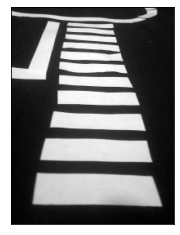

In [14]:
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
import numpy as np
import random
import math
import cv2

#gambar di-print di python
im = Image.open('SKRIPSI Zebra Cross.png')
#im = Image.open('SKRIPSI Pinus.png')
#im = Image.open('SKRIPSI Gedung C.png')

img1 = im.convert("L") #convert ke hitam-putih
width, height=img1.size

pyplot.xticks([]), pyplot.yticks([])
pyplot.imshow(img1, cmap = 'gray')

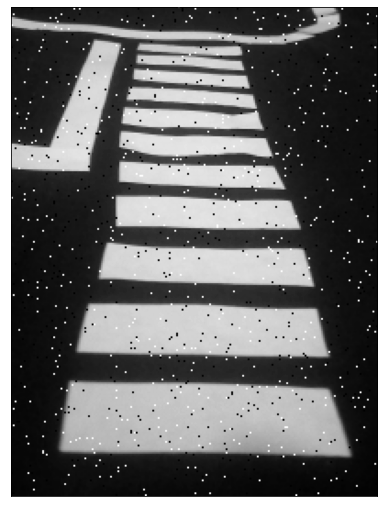

In [15]:
#PROGRAM UNTUK MEMBUAT DERAU SALT & PEPPER PADA CITRA DENGAN DERAU 2%
from numpy import array, random
from math import floor
#Fungsi Derau Salt-Pepper
def SaltPepper(im):
    totalrandpiks=floor(width*height/50)
    for i in range (floor(totalrandpiks/2)):
        koordx=random.randint(0,width)
        koordy=random.randint(0,height)
        im[koordy][koordx]=0 #hitam
        
    for i in range (floor(totalrandpiks/2)):
        koordx=random.randint(0,width)
        koordy=random.randint(0,height)
        im[koordy][koordx]=255 #putih
    
    return(im)  

Z=array(img1)
SP=SaltPepper(Z) #foto asli diberi derau Salt-Pepper

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,9))
pyplot.xticks([]), pyplot.yticks([])
pyplot.imshow(SP, cmap='gray')

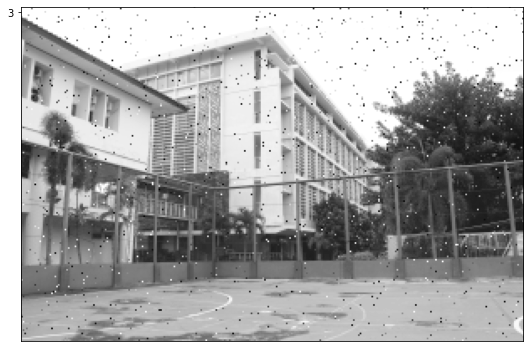

In [4]:
#PROGRAM UNTUK MEMBUAT DERAU UNIFORM PADA CITRA DENGAN DERAU 2%
from numpy import array, random
from math import floor, ceil
#Fungsi Derau Uniform
def Uniform(im):
    totalrandpiks=floor(width*height/50)
    for i in range (totalrandpiks):
        koordx=random.randint(0,width)
        koordy=random.randint(0,height)
        im[koordy][koordx]=ceil(random.normal(0,255)) #random uniform
    
    return(im)  

Z=array(img1)
UN=Uniform(Z) #foto asli diberi derau Salt-Pepper

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,9))
pyplot.xticks([]), pyplot.yticks([3])
pyplot.imshow(UN, cmap='gray')

In [16]:
#PROGRAM METODE BEDA HINGGA EKSPLISIT DIMENSI DUA UNTUK MENGHILANGKAN DERAU ACAK PADA CITRA
from numpy import linspace, array, zeros, insert, delete
from pandas import DataFrame, pivot_table
from math import ceil

D=1 #koefisien difusivitas
xm=width*2 #panjang sumbu x
yn=height*2 #panjang sumbu y
deltat=0.2 #selisih waktu
tn=10 #batas waktu pada t_n
m=width #banyak pemotongan pada sumbu x
n=height #banyak pemotongan pada sumbu y
deltax=xm/m #selisih antar posisi di sumbu x
deltay=yn/n #selisih antar posisi di sumbu y
lamda=(D*deltat)/(deltax)**2 #lamda

#melakukan uji kestabilan metode
if lamda<=0.25:
    print('Metode stabil, sebab lambda =', lamda, '<= 0.25')
else:
    print('Metode tidak stabil, cek kembali masukan')

#mendefinisikan array kosong VDERAU yg berisi para matriks berukuran mxn
#para matriks di dalam VDERAU disebut matriks U
VDERAU=array([zeros((n,m))])
WDERAU=array([zeros((n-2,m-2))]) #array display #tidak menampilkan piksel tepi

#mengisi syarat awal ke matriks U saat t=0
U=SP #matriks pertama U, diisi data gambar
#U=UN #matriks pertama U, diisi data gambar
#print(U)

#matriks pertama U dimasukkan ke array VDERAU
VDERAU=insert(VDERAU,0,U,axis = 0)

#matriks display awal X
#tepi dihapus satu persatu
X=delete(U, n-1, 0)
X=delete(X, 0, 0)
X=delete(X, m-1, 1)
X=delete(X, 0, 1)
WDERAU=insert(WDERAU,0,X,axis = 0)
#print(W)

#------------------------------ENTRI PERTAMA SELESAI-----------------------------

Q=array(zeros((n,m))) #matriks Q sebagai wadah kosong
#mengisi syarat batas ke setiap batas (tepi) matriks U saat t=1
for c in range (m):
    Q[0][c]=U[0][c]
    Q[n-1][c]=U[n-1][c]
for d in range (n):
    Q[d][0]=U[d][0]
    Q[d][m-1]=U[d][m-1]
#print(Q)

#mengisi entri matriks U yang belum terisi
#berdasarkan rumus metode eksplisit
for j in range (1,n-1):
    for i in range (1,m-1):
        Q[j][i]=ceil((1-4*lamda)*U[j][i]+lamda*(U[j-1][i]+U[j+1][i]+U[j][i-1]+U[j][i+1]))
#print(Q)
VDERAU=insert(VDERAU,1,Q,axis = 0)

#matriks display kedua S
#tepi dihapus satu persatu lagi
S=delete(Q, n-1, 0)
S=delete(S, 0, 0)
S=delete(S, m-1, 1)
S=delete(S, 0, 1)
WDERAU=insert(WDERAU,1,S,axis = 0)
#print(W)

#------------------------------ENTRI KEDUA SELESAI-----------------------------

#R=Q
R=array(zeros((n,m)))
for j in range (n):
    for i in range (m):
        R[j][i]=Q[j][i]
#print(R)

#mengisi syarat batas ke setiap batas matriks U saat t=2 sampai t=tn
for k in range (2,tn+1):  
    for c in range (m):
        R[0][c]=Q[0][c]
        R[n-1][c]=Q[n-1][c]
    for d in range (n):
        R[d][0]= Q[d][0]
        R[d][m-1]= Q[d][m-1]
#print(Q)

#mengisi entri matriks U yang belum terisi
#berdasarkan rumus metode eksplisit
    for j in range (1,n-1):
        for i in range (1,m-1):
            R[j][i]=ceil((1-4*lamda)*Q[j][i]+lamda*(Q[j-1][i]+Q[j+1][i]+Q[j][i-1]+Q[j][i+1]))
            #print(R)
            #print(Q)
    VDERAU=insert(VDERAU,k,R,axis = 0)
    #menghapus tepi
    T=delete(R, n-1, 0)
    T=delete(T, 0, 0)
    T=delete(T, m-1, 1)
    T=delete(T, 0, 1)
    WDERAU=insert(WDERAU,k,T,axis = 0)
    for j in range (n):
        for i in range (m):
            Q[j][i]=R[j][i]

#------------------------------ENTRI KETIGA SAMPAI TERAKHIR SELESAI-----------------------------            
            
#menghapus entri terakhir
VDERAU=delete(VDERAU, tn+1, 0) #VDERAU kumpulan matriks asli
#print(V)
WDERAU=delete(WDERAU, tn+1, 0) #WDERAU kumpulan matriks display
#print(W)

Metode stabil, sebab lambda = 0.05 <= 0.25


E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: overflow encountered in ubyte_scalars


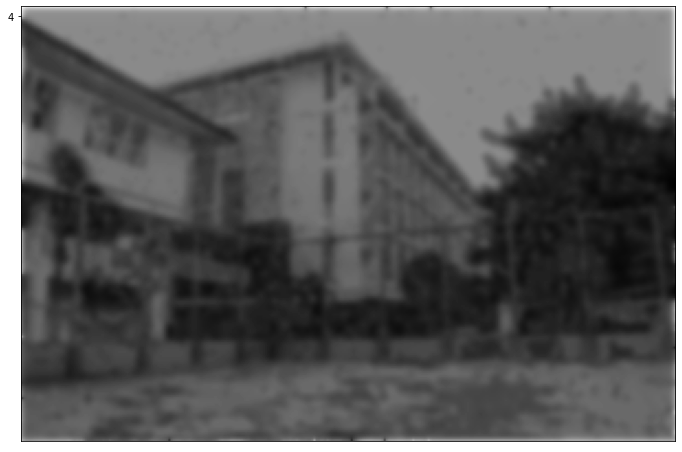

In [9]:
#PROGRAM UNTUK MENGELUARKAN HEATMAP HASIL
#METODE BEDA HINGGA EKSPLISIT DIMENSI DUA PADA PENGOLAHAN CITRA
#FORMASI DUA BARIS MASING-MASING DUA CITRA
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))

plt.subplot(111)
pyplot.xticks([]), pyplot.yticks([4])
pyplot.imshow(WDERAU[10], cmap='gray')

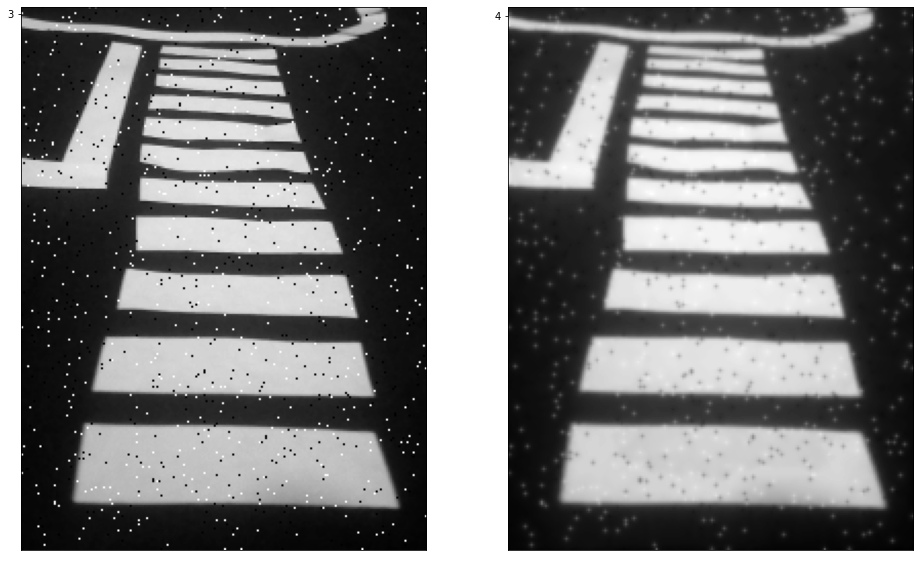

In [17]:
#PROGRAM UNTUK MENGELUARKAN HEATMAP HASIL
#METODE BEDA HINGGA EKSPLISIT DIMENSI DUA PADA PENGOLAHAN CITRA
#FORMASI DUA BARIS MASING-MASING DUA CITRA
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))

plt.subplot(121)
pyplot.xticks([]), pyplot.yticks([3])
pyplot.imshow(WDERAU[0], cmap='gray')

plt.subplot(122)
pyplot.xticks([]), pyplot.yticks([4])
pyplot.imshow(WDERAU[10], cmap='gray')

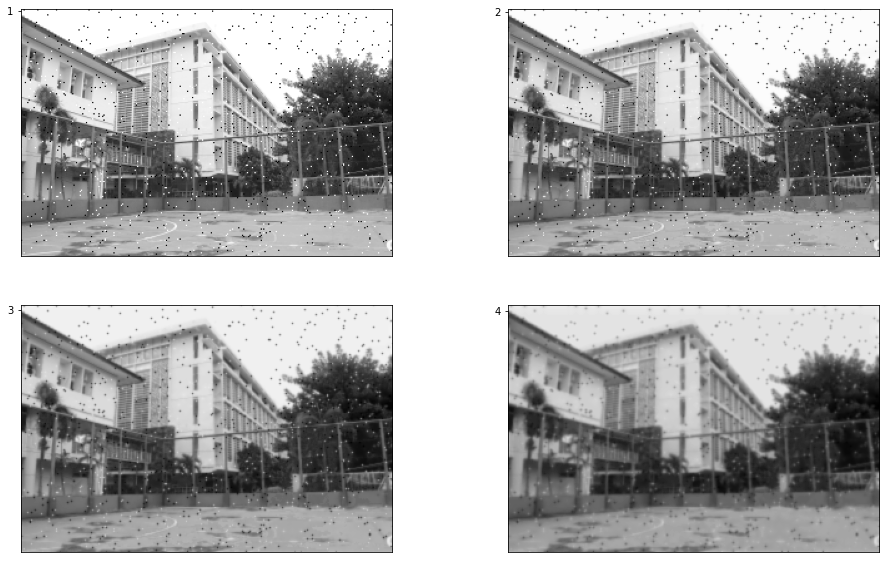

In [6]:
#PROGRAM UNTUK MENGELUARKAN HEATMAP HASIL
#METODE BEDA HINGGA EKSPLISIT DIMENSI DUA
#UNTUK MENGHILANGKAN DERAU ACAK
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))

plt.subplot(221)
pyplot.xticks([]), pyplot.yticks([1])
pyplot.imshow(WDERAU[0], cmap='gray')

plt.subplot(222)
pyplot.xticks([]), pyplot.yticks([2])
pyplot.imshow(WDERAU[2], cmap='gray')

plt.subplot(223)
pyplot.xticks([]), pyplot.yticks([3])
pyplot.imshow(WDERAU[5], cmap='gray')

plt.subplot(224)
pyplot.xticks([]), pyplot.yticks([4])
pyplot.imshow(WDERAU[10], cmap='gray')